In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [6]:
##Data creation 
from sklearn.datasets import make_blobs                

In [40]:
feat, label = make_blobs(n_samples= 1000,n_features= 2, centers= 4, random_state= 42,cluster_std= 1.8)

In [28]:
feat.shape

(1000, 2)

In [30]:
feat

array([[ -7.98846414,   6.54680799],
       [ -4.65334108,  -5.98223185],
       [ -5.20464645,  -6.65209342],
       ...,
       [  1.79168217,   9.87031588],
       [ -8.7081638 ,  -7.4410235 ],
       [-10.52483184,   6.69585729]])

In [26]:
feat[:,0]

array([ -7.98846414,  -4.65334108,  -5.20464645,   3.26179614,
         3.86110478,  -6.70858782,   5.78047239,  -4.13064417,
        -6.20788479,   8.25940574,   5.65268682,  -3.1347557 ,
        -1.91201854,  -4.12467737,  -5.04130548,  -3.24033409,
        -4.8589575 ,  -0.86790548,   0.41616158,   5.62066096,
         4.53582417,  -7.62713749,  -9.76243061, -15.20389245,
         2.77045726,   4.80705357,  -4.60837415,  -4.53996362,
        -6.33994474,   5.44102963,  -5.56881268, -11.14505919,
        -6.95470807,  -0.94337293,  -5.96217836,  -7.95765396,
        -8.62119754,   2.97428026,  -7.30471996,  -8.70752042,
        10.28595233,  -8.8338812 ,   3.17706016,  -9.84265375,
        10.18674712,  -0.90529772,  -4.46112533,   4.93787575,
       -14.46384517,   4.4293817 ,  -8.88684541,   0.189602  ,
         5.8646371 , -11.15696076,  -0.37435299, -15.2453504 ,
        -5.69610876,   0.06378125,  -5.403968  ,  -1.86191003,
        -8.68373012,  -4.49455702,  -6.96154081,  -6.87

<Axes: >

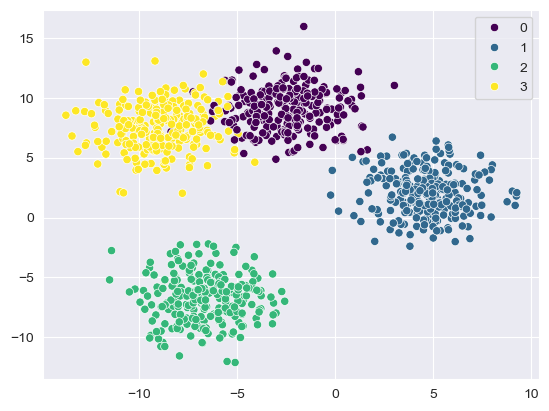

In [50]:
sns.set_style(style = "darkgrid")
sns.scatterplot(x = feat[:,0], y = feat[:,1],hue = label, palette= "viridis")

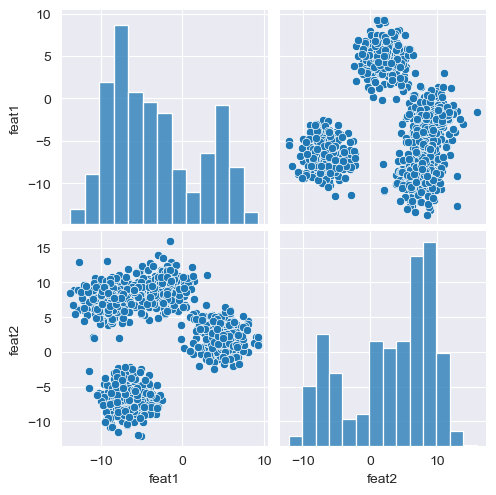

In [58]:
sns.pairplot(pd.DataFrame(feat, columns= ["feat1","feat2"]))

<Axes: >

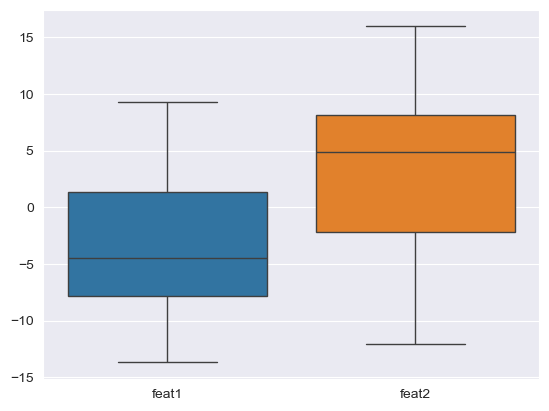

In [60]:
sns.boxplot(pd.DataFrame(feat, columns= ["feat1","feat2"])) ##Both graphs shows that the variables are skewed 
##Feature1 -> Right Skewed
##Feature1 -> Left Skewed

In [130]:
pd.DataFrame(feat, columns= ["feat1","feat2"]).skew()
##Data is Skewed but not that Skewed, usually
# Skewness Value (approx)	Interpretation
# ≈ 0	Perfectly symmetric
# 0.0 to ±0.5	Fairly symmetrical (OK)
# ±0.5 to ±1.0	Moderate skew 
# > ±1.0	High skew (Should fix)
###Our case fairly symmetrical : for right skewed can use Log
###For left & right both can use:rom sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')  # Handles 0s and negatives
# X_fixed = pt.fit_transform(X)

feat1    0.474808
feat2   -0.577247
dtype: float64

# Data Manipulation

In [133]:
##Scaling the data anyways as it is best practice to scale data before inputing data to KMeans
from sklearn.preprocessing import StandardScaler

Scaling = StandardScaler()
X_Scaled = Scaling.fit_transform(feat)

# Determing Best K

In [90]:
##Appropriate Number of Clusters using Silhoutte & Elbow method

from sklearn.metrics import silhouette_score

elbow = []
silhouette = []
for i in range(2,22):
    km = KMeans(n_clusters= i, init= 'k-means++', n_init = 10, random_state= 101).fit(feat)
    elbow.append(km.inertia_)
    ##vbasically comparing labels with data to get silhhouette score as defined in formula
    silhouette.append(silhouette_score(feat, km.fit_predict(feat)))
    

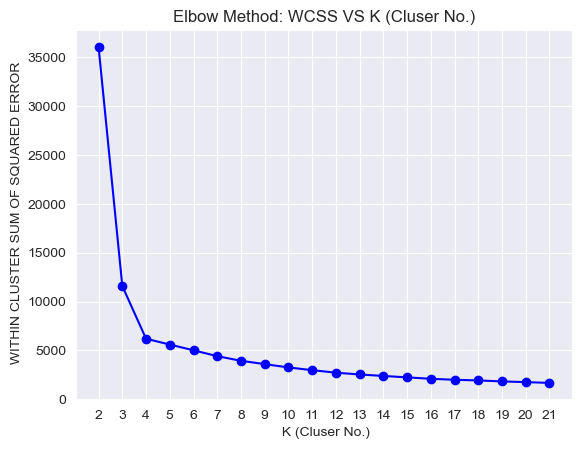

In [128]:
plt.clf()
plt.plot(range(2,22), elbow, "-bo")
plt.title("Elbow Method: WCSS VS K (Cluser No.)")
plt.xlabel(" K (Cluser No.)")
plt.ylabel(" WITHIN CLUSTER SUM OF SQUARED ERROR")
plt.xticks(range(2,22,1))
plt.grid(True) ## This removes axis text
##According to elbow method it says best K is 4 beyond this point improvement not that sig in WCSS

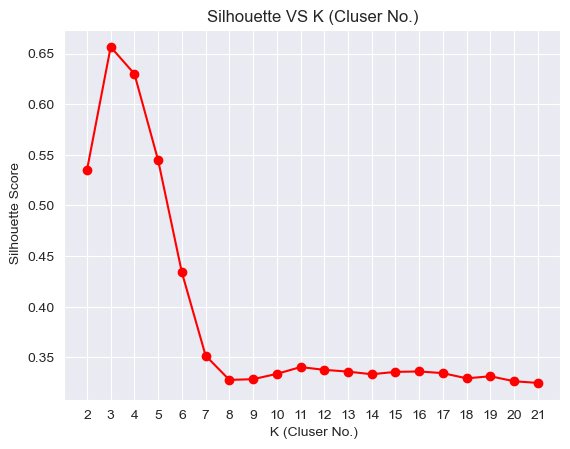

In [124]:
plt.clf()
plt.plot(range(2,22), silhouette, "-ro")
plt.title("Silhouette VS K (Cluser No.)")
plt.xlabel(" K (Cluser No.)")
plt.Ylabel(" Silhouette Score")
plt.xticks(range(2,22,1))
plt.grid(True) ## This removes axis text
##tHIS Suggests that k=3 is best as that where score is the highest of all

# KMeans for k =3 as suggested by Silhouette

In [137]:
##kmeans ++ ensure first centroid selection for all clusters are not purely random
kmm_3 = KMeans(n_clusters= 3, init= 'k-means++', n_init = 10, random_state= 101).fit(feat)

<Figure size 640x480 with 0 Axes>

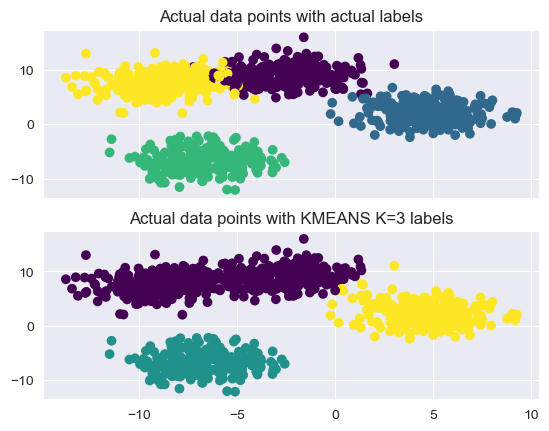

In [191]:
plt.clf()
plt
fig, axes = plt.subplots(nrows= 2, ncols =1 , sharex= True)
axes[0].scatter(x = feat[:,0], y = feat[:,1],c = label, cmap = "viridis")
axes[0].set_title("Actual data points with actual labels")
# # fig.show()
axes[1].set_title("Actual data points with KMEANS K=3 labels")
axes[1].scatter(x = feat[:,0], y = feat[:,1],c = kmm_3.labels_, cmap = "viridis")

# KMeans for k =4 as suggested by Elbow Method

In [195]:
kmm_4 = KMeans(n_clusters= 4, init= 'k-means++', n_init = 10, random_state= 101).fit(feat)

<Figure size 640x480 with 0 Axes>

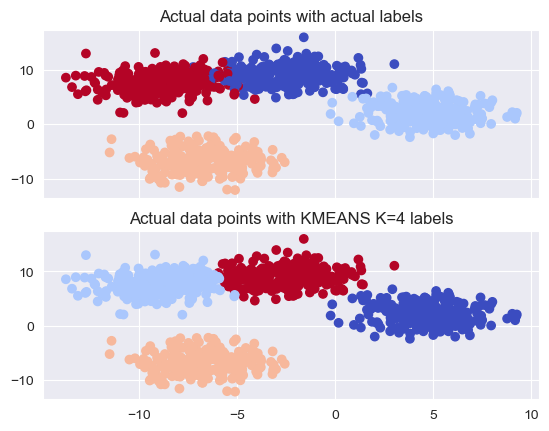

In [201]:
plt.clf()
plt
fig, axes = plt.subplots(nrows= 2, ncols =1 , sharex= True)
axes[0].scatter(x = feat[:,0], y = feat[:,1],c = label, cmap = "coolwarm")
axes[0].set_title("Actual data points with actual labels")
# # fig.show()
axes[1].set_title("Actual data points with KMEANS K=4 labels")
axes[1].scatter(x = feat[:,0], y = feat[:,1],c = kmm_4.labels_, cmap = "coolwarm")

In [203]:
## Can see roughly same clustering just some noise in top two clusters

# Evaluation
** It possible because we've the labels with us **

In [206]:
from sklearn import metrics

In [212]:
print(metrics.classification_report(label, kmm_4.labels_))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       250
           1       0.00      0.00      0.00       250
           2       1.00      1.00      1.00       250
           3       0.03      0.03      0.03       250

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000



In [214]:
print(metrics.accuracy_score(label, kmm_4.labels_))

0.259
